In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

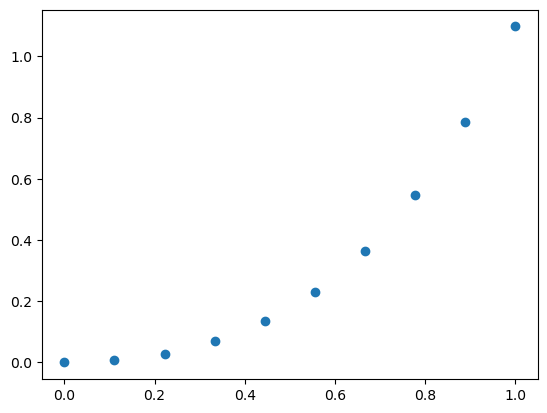

In [2]:
def f(x,y):
    return x + 2*y
def Solucion(x):
    return -0.5*x - (1-np.exp(2*x))/4.
N = 10
t = np.linspace(0,1,N)
h = t[1] - t[0]
yext = Solucion(t)
plt.scatter(t,yext)

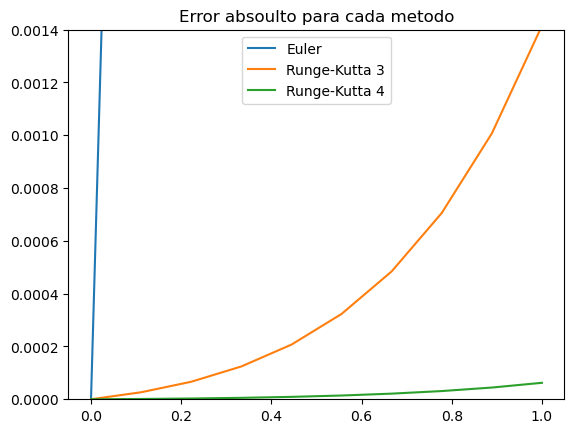

In [4]:
def GetEuler(x,y,h):    
    for i in range(1,len(x)):
        
        k1 = f(x[i-1],y[i-1])
        y[i] = y[i-1] + h*k1

def GetRungeKutta3(x,y,h):

    for i in range(1,len(x)):
        
        k1 = f(x[i-1],y[i-1])
        k2 = f(x[i-1]+0.5*h,y[i-1]+0.5*h*k1)
        k3 = f(x[i-1]+h,y[i-1]-h*k1+2*h*k2)
        
        y[i]= y[i-1]+ h/6 *(k1+4*k2+k3)
        
        
def GetRungeKutta4(x,y,h):

    for i in range(1,len(x)):
        
        k1 = f(x[i-1],y[i-1])
        k2 = f(x[i-1]+0.5*h,y[i-1]+0.5*h*k1)
        k3 = f(x[i-1]+0.5*h,y[i-1]+0.5*h*k2)
        
        k4 = f(x[i-1]+h,y[i-1]+h*k3)
        
        y[i]= y[i-1]+ h/6 *(k1+2*k2+2*k3+k4)

        
y1 = np.zeros_like(t)
y1[0] = 0

y3 = np.zeros_like(t)
y3[0] = 0

y4 = np.zeros_like(t)
y4[0] = 0

GetEuler(t,y1,h)
GetRungeKutta3(t,y3,h)
GetRungeKutta4(t,y4,h)


plt.plot(t,np.abs(yext-y1),label="Euler")
plt.plot(t,np.abs(yext-y3),label="Runge-Kutta 3")
plt.plot(t,np.abs(yext-y4),label="Runge-Kutta 4")

plt.ylim(0, 0.0014)
plt.title("Error absoulto para cada metodo")
plt.legend()


In [5]:
def g(x,y):
    return x + 2*y

def fc(z):
    return 1j*z

theta = 0.

N = 50
Vueltas = 3

h_ = Vueltas * 2*np.pi/N

g= 1

def ComplexEuler():
    global theta
    global h_
    global g
    
    theta += h_
    g += h_*fc(g)
    


Solucion1 = np.array([theta,g])

for i in range(N):
    ComplexEuler()
    Solucion1 = np.vstack([Solucion1, np.array([theta,g])])

In [6]:

theta = 0.

N = 50
Vueltas = 3

h_ = Vueltas * 2*np.pi/N

g= 1

def ComplexRungeKutta3():
    
    global theta
    global h_
    global g
    
    theta += h_
    
    k1 = fc(g)
    k2 = fc(g+0.5*h_*k1)
    k3 = fc(g-h_*k1+2*h_*k2)
        
    g+= h_/6 *(k1+4*k2+k3)

In [7]:
Solucion3 = np.array([theta,g])

for i in range(N):
    ComplexRungeKutta3()
    Solucion3 = np.vstack([Solucion3, np.array([theta,g])])

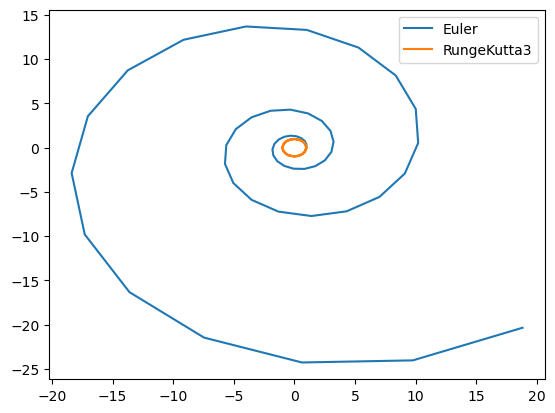

In [8]:
Re = np.real(Solucion1[:,1])
Im = np.imag(Solucion1[:,1])

Re3 = np.real(Solucion3[:,1])
Im3 = np.imag(Solucion3[:,1])


plt.plot(Re,Im,label="Euler")
plt.plot(Re3,Im3,label="RungeKutta3")

plt.legend()

In [9]:
def ComplexRungeKutta4():
    
    global theta
    global h_
    global g
    
    theta += h_
    
    k1 = fc(g)
    k2 = fc(g+0.5*h_*k1)
    k3 = fc(g+0.5*h_*k2)
    k4 = fc(g+h_*k3)
        
    g+= h_/6 *(k1+2*k2+2*k3+k4)

In [10]:
theta=0
g=1

Solucion4 = np.array([theta,g])

for i in range(N):
    ComplexRungeKutta4()
    Solucion4 = np.vstack([Solucion4, np.array([theta,g])])

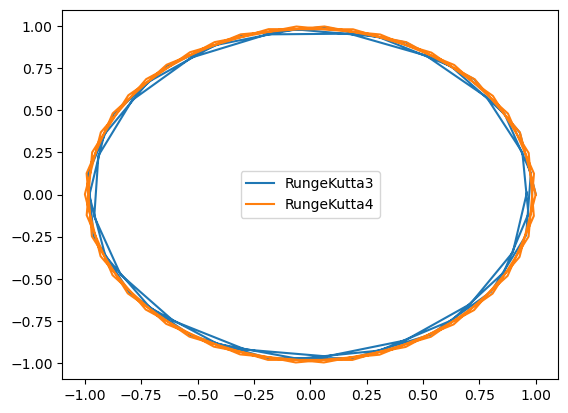

In [11]:
Re4 = np.real(Solucion4[:,1])
Im4 = np.imag(Solucion4[:,1])

plt.plot(Re3,Im3,label="RungeKutta3")
plt.plot(Re4,Im4,label="RungeKutta4")

plt.legend()